# Calgary Flames 2020-21 Regular Season Player Data at 5-on-5 (Minimum 100 Minutes Played at 5-on-5)

# Upload the Data and Read the .csv File

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

import scipy.stats as stats

In [ ]:
df = pd.read_csv('flames_2020-21_player_data.csv')

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format  # all values shown with 2 decimal places

In [ ]:
df.head()

,ID,Player,Position,GP,TOI,TOI/GP,CF/60,CA/60,CF%,FF/60,FA/60,FF%,SF/60,SA/60,SF%,GF/60,GA/60,GF%,xGF/60,xGA/60,xGF%,SCF/60,SCA/60,SCF%,HDCF/60,HDCA/60,HDCF%,HDGF/60,HDGA/60,HDGF%,MDCF/60,MDCA/60,MDCF%,MDGF/60,MDGA/60,MDGF%,LDCF/60,LDCA/60,LDCF%,LDGF/60,LDGA/60,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Start %,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Off. Zone Faceoff %
0,1,Mark Giordano,D,56,916.80,16.37,54.65,48.23,53.12,40.97,35.21,53.78,28.14,27.29,50.77,2.81,2.23,55.84,2.20,1.98,52.63,26.37,23.69,52.68,10.47,9.88,51.45,1.51,1.31,53.49,21.20,18.41,53.52,1.22,0.96,56.00,34.98,30.91,53.08,0.57,0.19,75.00,10.00,91.85,1.02,9.55,13.48,10.67,49.67,47.25,19.50,19.57,19.31,50.25
1,2,Milan Lucic,L,56,663.82,11.85,53.87,50.16,51.78,40.58,38.23,51.49,28.65,28.83,49.84,2.71,3.07,46.88,2.19,1.90,53.50,26.66,22.87,53.83,9.85,8.77,52.91,0.99,1.54,39.29,22.42,18.80,54.39,1.93,1.69,53.33,34.47,33.81,50.48,0.39,0.26,60.00,9.46,89.34,0.99,8.77,12.93,7.68,50.35,53.30,16.54,17.72,16.36,50.27
2,3,Mikael Backlund,C,54,720.95,13.35,57.17,48.02,54.35,44.19,36.29,54.91,31.46,25.38,55.34,2.75,2.83,49.25,2.48,1.84,57.44,27.38,22.97,54.38,11.40,9.15,55.47,1.08,1.50,41.94,21.31,18.42,53.63,1.78,1.33,57.14,37.51,31.62,54.26,0.48,0.36,57.14,8.73,88.85,0.98,8.74,12.98,9.90,45.27,46.88,16.48,17.31,17.48,48.53
3,4,Michael Stone,D,21,289.00,13.76,62.49,50.87,55.13,47.54,40.48,54.01,32.60,29.48,52.51,2.91,2.91,50.00,2.44,1.90,56.19,28.86,23.04,55.60,9.13,7.27,55.70,0.83,1.25,40.00,26.30,21.04,55.56,1.66,1.66,50.00,41.68,34.19,54.94,1.20,0.60,66.67,8.92,90.14,0.99,7.68,7.89,6.44,64.57,54.41,17.65,14.95,16.19,52.15
4,5,Christopher Tanev,D,56,987.32,17.63,53.96,42.96,55.67,42.05,31.36,57.28,29.90,22.30,57.28,2.31,1.40,62.30,2.31,1.47,61.12,27.16,19.20,58.58,10.76,6.32,62.99,1.34,0.91,59.46,21.88,17.18,56.02,0.97,0.57,63.16,33.62,28.70,53.94,0.26,0.09,75.00,7.72,93.73,1.01,7.72,13.19,9.66,49.16,44.41,18.54,19.69,18.90,49.51


In [ ]:
df

,ID,Player,Position,GP,TOI,TOI/GP,CF/60,CA/60,CF%,FF/60,FA/60,FF%,SF/60,SA/60,SF%,GF/60,GA/60,GF%,xGF/60,xGA/60,xGF%,SCF/60,SCA/60,SCF%,HDCF/60,HDCA/60,HDCF%,HDGF/60,HDGA/60,HDGF%,MDCF/60,MDCA/60,MDCF%,MDGF/60,MDGA/60,MDGF%,LDCF/60,LDCA/60,LDCF%,LDGF/60,LDGA/60,LDGF%,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Start %,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Off. Zone Faceoff %
0,1,Mark Giordano,D,56,916.80,16.37,54.65,48.23,53.12,40.97,35.21,53.78,28.14,27.29,50.77,2.81,2.23,55.84,2.20,1.98,52.63,26.37,23.69,52.68,10.47,9.88,51.45,1.51,1.31,53.49,21.20,18.41,53.52,1.22,0.96,56.00,34.98,30.91,53.08,0.57,0.19,75.00,10.00,91.85,1.02,9.55,13.48,10.67,49.67,47.25,19.50,19.57,19.31,50.25
1,2,Milan Lucic,L,56,663.82,11.85,53.87,50.16,51.78,40.58,38.23,51.49,28.65,28.83,49.84,2.71,3.07,46.88,2.19,1.90,53.50,26.66,22.87,53.83,9.85,8.77,52.91,0.99,1.54,39.29,22.42,18.80,54.39,1.93,1.69,53.33,34.47,33.81,50.48,0.39,0.26,60.00,9.46,89.34,0.99,8.77,12.93,7.68,50.35,53.30,16.54,17.72,16.36,50.27
2,3,Mikael Backlund,C,54,720.95,13.35,57.17,48.02,54.35,44.19,36.29,54.91,31.46,25.38,55.34,2.75,2.83,49.25,2.48,1.84,57.44,27.38,22.97,54.38,11.40,9.15,55.47,1.08,1.50,41.94,21.31,18.42,53.63,1.78,1.33,57.14,37.51,31.62,54.26,0.48,0.36,57.14,8.73,88.85,0.98,8.74,12.98,9.90,45.27,46.88,16.48,17.31,17.48,48.53
3,4,Michael Stone,D,21,289.00,13.76,62.49,50.87,55.13,47.54,40.48,54.01,32.60,29.48,52.51,2.91,2.91,50.00,2.44,1.90,56.19,28.86,23.04,55.60,9.13,7.27,55.70,0.83,1.25,40.00,26.30,21.04,55.56,1.66,1.66,50.00,41.68,34.19,54.94,1.20,0.60,66.67,8.92,90.14,0.99,7.68,7.89,6.44,64.57,54.41,17.65,14.95,16.19,52.15
4,5,Christopher Tanev,D,56,987.32,17.63,53.96,42.96,55.67,42.05,31.36,57.28,29.90,22.30,57.28,2.31,1.40,62.30,2.31,1.47,61.12,27.16,19.20,58.58,10.76,6.32,62.99,1.34,0.91,59.46,21.88,17.18,56.02,0.97,0.57,63.16,33.62,28.70,53.94,0.26,0.09,75.00,7.72,93.73,1.01,7.72,13.19,9.66,49.16,44.41,18.54,19.69,18.90,49.51
5,6,Joakim Nordstrom,C,44,391.48,8.90,55.48,49.96,52.62,40.46,37.09,52.17,27.28,26.05,51.15,2.15,1.84,53.85,2.09,1.96,51.61,23.60,21.00,52.92,9.50,8.89,51.67,0.77,1.07,41.67,18.80,16.14,53.80,1.43,1.02,58.33,40.29,36.31,52.60,0.44,0.00,100.00,7.87,92.94,1.01,9.81,14.56,8.43,53.64,53.78,16.55,19.00,17.17,49.09
6,7,Nikita Nesterov,D,38,532.28,14.01,55.80,51.96,51.78,42.27,41.59,50.40,29.53,31.56,48.34,2.14,3.16,40.43,2.25,2.02,52.76,25.25,24.46,50.79,9.36,9.36,50.00,1.01,1.80,36.00,21.19,20.14,51.27,1.20,1.05,53.33,38.26,35.33,51.99,0.33,0.81,28.57,7.25,90.00,0.97,8.45,7.21,5.97,59.29,58.59,17.36,12.17,13.08,57.04
7,8,Johnny Gaudreau,L,56,778.07,13.89,53.67,50.12,51.71,41.49,39.33,51.34,29.84,28.99,50.72,2.78,2.24,55.38,2.40,2.04,54.07,26.22,25.22,50.97,10.87,9.41,53.61,1.62,1.16,58.33,20.46,21.08,49.26,1.03,1.03,50.00,34.64,31.52,52.36,0.56,0.45,55.56,9.30,92.29,1.02,13.11,11.88,7.87,44.34,62.50,21.44,16.12,15.27,58.40
8,9,Josh Leivo,L,38,384.60,10.12,56.94,45.55,55.56,41.65,33.39,55.51,28.24,25.90,52.16,1.87,2.18,46.15,2.32,1.67,58.10,26.52,22.15,54.49,11.08,7.33,60.17,1.25,1.25,50.00,20.59,19.76,51.03,0.83,1.25,40.00,38.31,29.97,56.11,0.00,0.00,-,6.63,91.57,0.98,10.30,11.70,8.11,52.89,55.93,17.94,16.07,14.98,54.50
9,10,Brett Ritchie,R,32,350.82,10.96,48.40,45.49,51.55,37.63,35.75,51.28,25.31,25.83,49.50,1.71,2.57,40.00,1.92,2.07,48.15,24.63,23.09,51.61,9.06,9.58,48.62,0.86,1.20,41.67,20.75,18.02,53.53,0.91,1.60,36.36,30.88,27.17,53.19,0.25,0.25,50.00,6.76,90.07,0.97,10.09,13.85,9.06,54.05,52.68,16.93,18.98,17.27,49.50


# Preliminary Data Exploration with Pandas


In [ ]:
df.shape

(22, 54)

In [ ]:
df.columns

Index(['ID', 'Player', 'Position', 'GP', 'TOI', 'TOI/GP', 'CF/60', 'CA/60',
       'CF%', 'FF/60', 'FA/60', 'FF%', 'SF/60', 'SA/60', 'SF%', 'GF/60',
       'GA/60', 'GF%', 'xGF/60', 'xGA/60', 'xGF%', 'SCF/60', 'SCA/60', 'SCF%',
       'HDCF/60', 'HDCA/60', 'HDCF%', 'HDGF/60', 'HDGA/60', 'HDGF%', 'MDCF/60',
       'MDCA/60', 'MDCF%', 'MDGF/60', 'MDGA/60', 'MDGF%', 'LDCF/60', 'LDCA/60',
       'LDCF%', 'LDGF/60', 'LDGA/60', 'LDGF%', 'On-Ice SH%', 'On-Ice SV%',
       'PDO', 'Off. Zone Starts/60', 'Neu. Zone Starts/60',
       'Def. Zone Starts/60', 'On The Fly Starts/60', 'Off. Zone Start %',
       'Off. Zone Faceoffs/60', 'Neu. Zone Faceoffs/60',
       'Def. Zone Faceoffs/60', 'Off. Zone Faceoff %'],
      dtype='object')

In [ ]:
df.isna().any()         # check for missing values for each column
df.isna().any().any()   # check for missing values in the entire table


False

In [ ]:
df.duplicated().any().any()
df.duplicated().values.any()  # check for any dupplicate values in the table

False

In [ ]:
df.describe()

,ID,GP,TOI,TOI/GP,CF/60,CA/60,CF%,FF/60,FA/60,FF%,SF/60,SA/60,SF%,GF/60,GA/60,GF%,xGF/60,xGA/60,xGF%,SCF/60,SCA/60,SCF%,HDCF/60,HDCA/60,HDCF%,HDGF/60,HDGA/60,HDGF%,MDCF/60,MDCA/60,MDCF%,MDGF/60,MDGA/60,LDCF/60,LDCA/60,LDCF%,LDGF/60,LDGA/60,On-Ice SH%,On-Ice SV%,PDO,Off. Zone Starts/60,Neu. Zone Starts/60,Def. Zone Starts/60,On The Fly Starts/60,Off. Zone Start %,Off. Zone Faceoffs/60,Neu. Zone Faceoffs/60,Def. Zone Faceoffs/60,Off. Zone Faceoff %
count,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,11.50,44.18,591.79,13.05,55.68,49.31,53.05,42.03,38.11,52.50,29.34,27.68,51.50,2.46,2.39,51.04,2.25,1.94,53.76,26.70,22.98,53.78,10.25,8.75,54.13,1.21,1.31,47.31,21.94,18.98,53.57,1.23,1.08,36.06,33.15,52.08,0.44,0.37,8.36,91.39,1.00,9.78,12.22,8.20,51.69,54.56,18.43,17.22,15.78,54.14
std,6.49,14.70,253.32,2.51,3.41,3.66,2.66,2.52,3.50,3.09,2.12,2.65,3.24,0.43,0.60,7.01,0.17,0.22,3.83,1.78,2.30,3.70,0.90,1.41,5.03,0.41,0.30,11.11,2.15,1.73,3.78,0.45,0.52,3.37,2.83,3.32,0.30,0.38,1.22,1.84,0.02,1.79,2.19,1.91,5.72,8.09,1.92,2.26,2.97,6.51
min,1.00,8.00,100.85,8.90,48.40,41.33,46.45,36.89,30.05,45.26,24.39,21.55,44.09,1.71,1.40,36.17,1.92,1.47,47.04,23.60,17.15,48.28,9.03,5.72,45.75,0.59,0.59,25.00,18.24,15.24,46.00,0.00,0.00,26.64,27.17,41.33,0.00,0.00,6.25,86.30,0.94,6.85,7.12,3.55,44.34,44.41,15.50,12.17,7.69,47.73
25%,6.25,38.00,395.95,11.82,54.13,47.97,51.78,40.68,36.49,51.30,28.28,25.96,49.84,2.14,2.01,47.36,2.10,1.84,51.63,25.48,22.25,51.63,9.39,7.80,51.38,0.94,1.19,41.67,20.63,18.24,51.26,0.98,0.81,34.51,31.06,50.84,0.28,0.11,7.37,90.17,0.98,8.68,11.88,7.63,46.64,48.04,17.17,16.06,13.97,49.70
50%,11.50,49.50,658.77,13.19,55.62,49.94,52.92,42.02,38.49,51.94,29.64,28.13,50.89,2.58,2.29,51.06,2.25,1.94,53.13,26.49,23.06,53.42,10.21,8.90,53.55,1.21,1.30,46.06,21.69,19.45,53.66,1.21,1.04,36.56,33.44,52.58,0.42,0.31,8.80,91.86,1.00,9.66,12.77,8.29,50.46,53.44,17.95,17.55,16.84,51.36
75%,16.75,56.00,769.84,13.93,57.11,50.92,54.86,42.69,39.82,54.11,30.48,29.48,53.19,2.77,2.81,56.23,2.39,2.03,55.94,27.34,24.42,54.84,10.86,9.54,56.43,1.34,1.47,52.62,22.85,20.05,54.51,1.64,1.33,38.17,35.05,53.91,0.56,0.53,9.26,92.32,1.01,10.67,13.43,9.52,54.66,58.56,19.40,19.00,17.64,56.76
max,22.00,56.00,987.32,17.89,62.49,58.30,59.71,47.54,44.62,60.12,33.05,31.56,58.00,3.15,4.01,62.30,2.49,2.36,61.12,30.63,26.77,64.11,11.93,11.26,66.95,2.38,2.00,80.00,26.30,21.42,62.50,1.93,2.32,41.68,37.81,56.25,1.20,1.72,10.00,94.23,1.04,13.11,14.90,10.95,64.57,77.78,23.66,19.75,19.32,75.47


In [ ]:
print(df.Player.describe()) # check type and info for one column
df.info()  # pandas object datatype is the same as python string or mixed

count               22
unique              22
top       Sean Monahan
freq                 1
Name: Player, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22 non-null     int64  
 1   Player                 22 non-null     object 
 2   Position               22 non-null     object 
 3   GP                     22 non-null     int64  
 4   TOI                    22 non-null     float64
 5   TOI/GP                 22 non-null     float64
 6   CF/60                  22 non-null     float64
 7   CA/60                  22 non-null     float64
 8   CF%                    22 non-null     float64
 9   FF/60                  22 non-null     float64
 10  FA/60                  22 non-null     float64
 11  FF%                    22 non-null     float64
 12  SF/60                  22 non-null     float

# Flames Skaters - Possession Metrics

Skater with the Highest Corsi For Percentage (CF%)

In [ ]:
df["CF%"].idxmax()  # find index of the record with the highest CF%

17

In [ ]:
# highest_cf = df["CF%"].loc[17]
highest_cf = df["CF%"].max()
print(f"{highest_cf}%")   # highest CF%
print(df["Player"].loc[17])   # player with the highest CF%

59.71%
Derek Ryan


Skater with the Lowest Corsi For Percentage (CF%)

In [ ]:
print(df["CF%"].idxmin())  # find index of the record with the lowest CF%

18

In [ ]:
# lowest_cf = df["CF%"].loc[18]
lowest_cf = df["CF%"].min()
print(f"{lowest_cf}%")   # lowest CF%
print(df["Player"].loc[18])   # player with the lowest CF%

46.45%
Dominik Simon


Top 5 Skaters - Corsi For Percentage (CF%)

In [ ]:
highest_cf_list = df.sort_values("CF%", ascending=False)
highest_cf_list.head()
highest_cf_list[["Player", "CF%", "TOI"]].head()

,Player,CF%,TOI
17,Derek Ryan,59.71,409.35
4,Christopher Tanev,55.67,987.32
8,Josh Leivo,55.56,384.60
19,Matthew Tkachuk,55.52,780.87
3,Michael Stone,55.13,289.00


Defensemen - Corsi For Percentage (CF%)

In [ ]:
defense_df = df[df["Position"] == "D"]
defense_df.sort_values("CF%", ascending=False)
defense_df[["Player", "CF%", "TOI"]].sort_values("CF%", ascending=False)

,Player,CF%,TOI
4,Christopher Tanev,55.67,987.32
3,Michael Stone,55.13,289.00
16,Oliver Kylington,54.34,101.42
0,Mark Giordano,53.12,916.80
14,Noah Hanifin,53.03,840.80
21,Juuso Valimaki,53.00,665.42
6,Nikita Nesterov,51.78,532.28
15,Rasmus Andersson,50.06,921.82


Forwards - Top 5 in Corsi For Percentage (CF%)

In [ ]:
forwards_df = df[df["Position"] != "D"]
forwards_df.sort_values("CF%", ascending=False)
forwards_df[["Player", "CF%", "TOI"]].sort_values("CF%", ascending=False).head()

,Player,CF%,TOI
17,Derek Ryan,59.71,409.35
8,Josh Leivo,55.56,384.60
19,Matthew Tkachuk,55.52,780.87
13,Andrew Mangiapane,55.03,724.38
2,Mikael Backlund,54.35,720.95


Forwards - Bottom 5 in Corsi For Percentage (CF%)

In [ ]:
forwards_df[["Player", "CF%", "TOI"]].sort_values("CF%", ascending=False).tail()

,Player,CF%,TOI
1,Milan Lucic,51.78,663.82
7,Johnny Gaudreau,51.71,778.07
9,Brett Ritchie,51.55,350.82
11,Sean Monahan,49.68,653.72
18,Dominik Simon,46.45,100.85


# Flames Skaters - Scoring and Defensive Metrics

Top 5 Skaters - High Danger Scoring Chances For per 60 Minutes (HDCF/60)

In [ ]:
highest_hdcf_60_list = df.sort_values("HDCF/60", ascending=False)
highest_hdcf_60_list[["Player", "HDCF/60", "TOI"]].head()
# small sample size for some players, as seen in TOI

,Player,HDCF/60,TOI
13,Andrew Mangiapane,11.93,724.38
17,Derek Ryan,11.58,409.35
2,Mikael Backlund,11.40,720.95
18,Dominik Simon,11.30,100.85
8,Josh Leivo,11.08,384.60


Top 5 Skaters - High Danger Scoring Chances Against per 60 Minutes (HDCA/60)



In [ ]:
highest_hdca_60_list = df.sort_values("HDCA/60", ascending=False)
highest_hdca_60_list[["Player", "HDCA/60"]].head()

,Player,HDCA/60
15,Rasmus Andersson,11.26
12,Sam Bennett,11.09
18,Dominik Simon,10.71
0,Mark Giordano,9.88
11,Sean Monahan,9.64


Forwards - High Danger Scoring Chances For per 60 Minutes (HDCF/60)

In [ ]:
forwards_df.sort_values("HDCF/60", ascending=False)
forwards_df[["Player", "HDCF/60", "TOI"]].sort_values("HDCF/60", ascending=False)

,Player,HDCF/60,TOI
13,Andrew Mangiapane,11.93,724.38
17,Derek Ryan,11.58,409.35
2,Mikael Backlund,11.40,720.95
18,Dominik Simon,11.30,100.85
8,Josh Leivo,11.08,384.60
7,Johnny Gaudreau,10.87,778.07
19,Matthew Tkachuk,10.83,780.87
1,Milan Lucic,9.85,663.82
11,Sean Monahan,9.82,653.72
5,Joakim Nordstrom,9.50,391.48


Defensemen - High Danger Scoring Chances For per 60 Minutes (HDCF/60)

In [ ]:
defense_df.sort_values("HDCF/60", ascending=False)
defense_df[["Player", "HDCF/60", "TOI"]].sort_values("HDCF/60", ascending=False)

,Player,HDCF/60,TOI
4,Christopher Tanev,10.76,987.32
21,Juuso Valimaki,10.64,665.42
0,Mark Giordano,10.47,916.80
14,Noah Hanifin,10.35,840.80
16,Oliver Kylington,10.06,101.42
15,Rasmus Andersson,9.96,921.82
6,Nikita Nesterov,9.36,532.28
3,Michael Stone,9.13,289.00


Centres - High Danger Chances Against per 60 Minutes (HDCA/60)

In [ ]:
centres_df = df[df["Position"] == "C"]
centres_df.sort_values("HDCA/60", ascending=False)
centres_df[["Player", "HDCA/60", "TOI"]].sort_values("HDCA/60", ascending=True)

,Player,HDCA/60,TOI
17,Derek Ryan,5.72,409.35
20,Dillon Dube,7.85,611.43
10,Elias Lindholm,8.37,745.15
5,Joakim Nordstrom,8.89,391.48
2,Mikael Backlund,9.15,720.95
11,Sean Monahan,9.64,653.72
18,Dominik Simon,10.71,100.85
12,Sam Bennett,11.09,448.97


Forwards - High Danger Chances Against per 60 Minutes (HDCA/60)

In [ ]:
forwards_df[["Player", "HDCA/60", "TOI"]].sort_values("HDCA/60", ascending=True)

,Player,HDCA/60,TOI
17,Derek Ryan,5.72,409.35
8,Josh Leivo,7.33,384.60
20,Dillon Dube,7.85,611.43
10,Elias Lindholm,8.37,745.15
13,Andrew Mangiapane,8.37,724.38
1,Milan Lucic,8.77,663.82
5,Joakim Nordstrom,8.89,391.48
19,Matthew Tkachuk,8.91,780.87
2,Mikael Backlund,9.15,720.95
7,Johnny Gaudreau,9.41,778.07


Defensemen - High Danger Chances Against per 60 (HDCA/60)

In [ ]:
defense_df.sort_values("HDCA/60", ascending=False)
defense_df[["Player", "HDCA/60", "TOI"]].sort_values("HDCA/60", ascending=True)

,Player,HDCA/60,TOI
4,Christopher Tanev,6.32,987.32
3,Michael Stone,7.27,289.00
16,Oliver Kylington,7.69,101.42
14,Noah Hanifin,7.78,840.80
21,Juuso Valimaki,9.11,665.42
6,Nikita Nesterov,9.36,532.28
0,Mark Giordano,9.88,916.80
15,Rasmus Andersson,11.26,921.82


Forwards - Expected Goals For per 60 Minutes (xGF/60)

In [ ]:
forwards_df.sort_values("xGF/60", ascending=False)
forwards_df[["Player", "xGF/60", "TOI"]].sort_values("xGF/60", ascending=False)

,Player,xGF/60,TOI
13,Andrew Mangiapane,2.49,724.38
2,Mikael Backlund,2.48,720.95
17,Derek Ryan,2.48,409.35
18,Dominik Simon,2.41,100.85
7,Johnny Gaudreau,2.40,778.07
19,Matthew Tkachuk,2.35,780.87
8,Josh Leivo,2.32,384.60
1,Milan Lucic,2.19,663.82
10,Elias Lindholm,2.15,745.15
12,Sam Bennett,2.13,448.97


Defensemen - Expected Goals For per 60 Minutes (xGF/60)

---



In [ ]:
defense_df.sort_values("xGF/60", ascending=False)
defense_df[["Player", "xGF/60", "TOI"]].sort_values("xGF/60", ascending=False)

,Player,xGF/60,TOI
3,Michael Stone,2.44,289.00
21,Juuso Valimaki,2.34,665.42
4,Christopher Tanev,2.31,987.32
6,Nikita Nesterov,2.25,532.28
14,Noah Hanifin,2.25,840.80
0,Mark Giordano,2.20,916.80
15,Rasmus Andersson,2.08,921.82
16,Oliver Kylington,2.03,101.42


Defensemen - Expected Goals Allowed per 60 Minutes (xGF/60)

In [ ]:
defense_df.sort_values("xGA/60", ascending=False)
defense_df[["Player", "xGA/60", "TOI"]].sort_values("xGA/60", ascending=True)

,Player,xGA/60,TOI
4,Christopher Tanev,1.47,987.32
14,Noah Hanifin,1.83,840.80
16,Oliver Kylington,1.85,101.42
3,Michael Stone,1.90,289.00
0,Mark Giordano,1.98,916.80
6,Nikita Nesterov,2.02,532.28
21,Juuso Valimaki,2.03,665.42
15,Rasmus Andersson,2.34,921.82


Players whose Expected Goals For per 60 were above the mean?

In [ ]:
print(f"Team Average xGF: {df['xGF/60'].mean():.2f}")
higher_xgf_60_df = df[df['xGF/60'] > df['xGF/60'].mean()]
higher_xgf_60_df[["Player", 'xGF/60', "TOI"]].sort_values("xGF/60", ascending=False)

Team Average xGF: 2.25


,Player,xGF/60,TOI
13,Andrew Mangiapane,2.49,724.38
2,Mikael Backlund,2.48,720.95
17,Derek Ryan,2.48,409.35
3,Michael Stone,2.44,289.00
18,Dominik Simon,2.41,100.85
7,Johnny Gaudreau,2.40,778.07
19,Matthew Tkachuk,2.35,780.87
21,Juuso Valimaki,2.34,665.42
8,Josh Leivo,2.32,384.60
4,Christopher Tanev,2.31,987.32


Players whose Expected Goals Against per 60 were less than the mean?

In [ ]:
print(f"Team Average xGA: {df['xGA/60'].mean():.2f}")
lowest_xgf_60_df = df[df['xGA/60'] < df['xGA/60'].mean()]
lowest_xgf_60_df[["Player", 'xGA/60']].sort_values("xGA/60", ascending=True)

Team Average xGA: 1.94


,Player,xGA/60
4,Christopher Tanev,1.47
17,Derek Ryan,1.58
8,Josh Leivo,1.67
13,Andrew Mangiapane,1.76
14,Noah Hanifin,1.83
2,Mikael Backlund,1.84
16,Oliver Kylington,1.85
1,Milan Lucic,1.90
3,Michael Stone,1.90
19,Matthew Tkachuk,1.92


# Grouping by Position

Number of Players in each Position

In [ ]:
df.Position.value_counts()

D    8
C    8
L    5
R    1
Name: Position, dtype: int64

Average Statistics by Position

In [ ]:

grouped_df = df.groupby('Position')
grouped_df[["CF%", "xGF/60", "xGA/60", "HDCF/60", "HDCA/60"]].mean()

,CF%,xGF/60,xGA/60,HDCF/60,HDCA/60
Position,,,,,
C,52.47,2.24,1.98,10.13,8.93
D,53.27,2.24,1.93,10.09,8.58
L,53.92,2.35,1.86,10.91,8.56
R,51.55,1.92,2.07,9.06,9.58


# Data Visualization with Matplotlib

In [ ]:
# only use line graphs for time-based data

Correlation between Corsi For and Expected Goals For (per 60 minutes)

In [ ]:
avg_cf_60 = df['CF/60'].mean()
print(f"Team Average CF/60: {avg_cf_60}")

Team Average CF/60: 55.683181818181815


In [ ]:
avg_xgf_60 = df["xGF/60"].mean()
print(f"Team Average xGF/60: {avg_xgf_60}")

Team Average xGF/60: 2.248636363636363


,Player,CF/60,xGF/60
3,Michael Stone,62.49,2.44
17,Derek Ryan,61.27,2.48
13,Andrew Mangiapane,60.30,2.49
19,Matthew Tkachuk,59.86,2.35
21,Juuso Valimaki,57.35,2.34
2,Mikael Backlund,57.17,2.48
8,Josh Leivo,56.94,2.32
10,Elias Lindholm,55.96,2.15
12,Sam Bennett,55.86,2.13
6,Nikita Nesterov,55.80,2.25


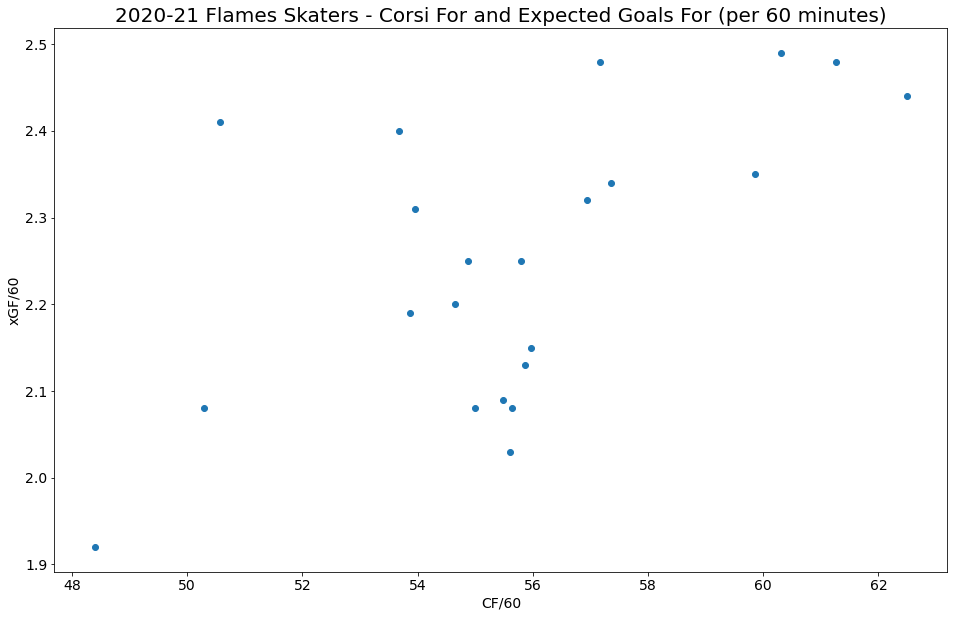

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('2020-21 Flames Skaters - Corsi For and Expected Goals For (per 60 minutes)', fontsize=20)
plt.xlabel('CF/60', fontsize=14)
plt.ylabel('xGF/60', fontsize=14)
plt.scatter(df["CF/60"], df["xGF/60"])
# outliers?
df[["Player", 'CF/60', 'xGF/60']].sort_values('CF/60', ascending=False)

Correlation between High Danger Scoring Chances For and Expected Goals For (per 60 minutes)

In [ ]:
avg_hdcf_60 = df['HDCF/60'].mean()
print(f"Team Average HDCF/60: {avg_hdcf_60}")

Team Average HDCF/60: 10.246818181818185


In [ ]:
avg_xgf_60 = df["xGF/60"].mean()
print(f"Team Average xGF/60: {avg_xgf_60}")

Team Average xGF/60: 2.248636363636363


,Player,HDCF/60,xGF/60,TOI
13,Andrew Mangiapane,11.93,2.49,724.38
17,Derek Ryan,11.58,2.48,409.35
2,Mikael Backlund,11.40,2.48,720.95
18,Dominik Simon,11.30,2.41,100.85
8,Josh Leivo,11.08,2.32,384.60
7,Johnny Gaudreau,10.87,2.40,778.07
19,Matthew Tkachuk,10.83,2.35,780.87
4,Christopher Tanev,10.76,2.31,987.32
21,Juuso Valimaki,10.64,2.34,665.42
0,Mark Giordano,10.47,2.20,916.80


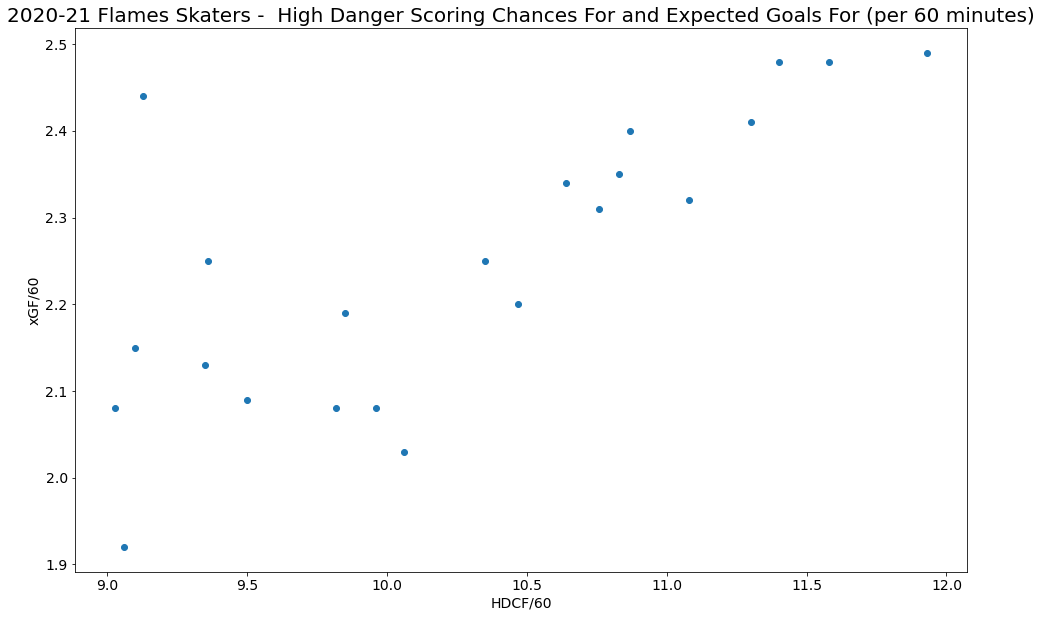

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('2020-21 Flames Skaters -  High Danger Scoring Chances For and Expected Goals For (per 60 minutes)', fontsize=20)
plt.xlabel('HDCF/60', fontsize=14)
plt.ylabel('xGF/60', fontsize=14)
plt.scatter(df["HDCF/60"], df["xGF/60"])
# outliers?
df[["Player", 'HDCF/60', 'xGF/60', 'TOI']].sort_values('HDCF/60', ascending=False)

Correlation between Offensive Zone Starts and Expected Goals For (per 60 minutes)


In [ ]:
avg_off_starts_60 = df['Off.\xa0Zone Starts/60'].mean()
print(f"Team Average Off. Zone Starts/60: {avg_off_starts_60}")

Team Average Off. Zone Starts/60: 9.778636363636364


In [ ]:
avg_xgf_60 = df["xGF/60"].mean()
print(f"Team Average xGF/60: {avg_xgf_60}")

Team Average xGF/60: 2.248636363636363


Correlation between Offensive Zone Starts and Expected Goals For (per 60 minutes)

,Player,Off. Zone Starts/60,xGF/60,TOI
7,Johnny Gaudreau,13.11,2.40,778.07
11,Sean Monahan,12.67,2.08,653.72
18,Dominik Simon,12.49,2.41,100.85
16,Oliver Kylington,12.42,2.03,101.42
12,Sam Bennett,11.63,2.13,448.97
10,Elias Lindholm,10.79,2.15,745.15
8,Josh Leivo,10.30,2.32,384.60
13,Andrew Mangiapane,10.27,2.49,724.38
9,Brett Ritchie,10.09,1.92,350.82
5,Joakim Nordstrom,9.81,2.09,391.48


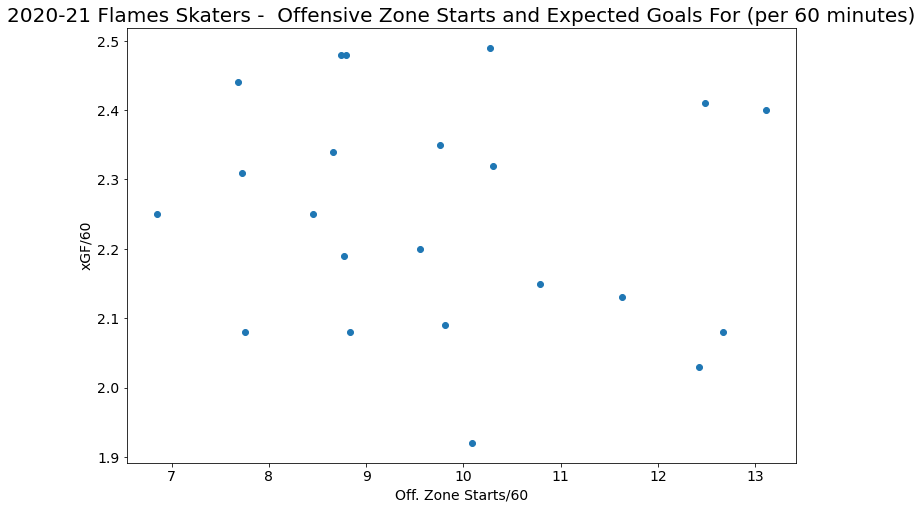

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('2020-21 Flames Skaters -  Offensive Zone Starts and Expected Goals For (per 60 minutes)', fontsize=20)
plt.xlabel('Off. Zone Starts/60', fontsize=14)
plt.ylabel('xGF/60', fontsize=14)
plt.scatter(df['Off.\xa0Zone Starts/60'], df["xGF/60"])
# outliers?
# df[["Player", 'Off.\xa0Zone Starts/60', 'xGF/60', 'TOI']].sort_values('Off.\xa0Zone Starts/60', ascending=False)[:2]
# df[["Player", 'Off.\xa0Zone Starts/60', 'xGF/60', 'TOI']].sort_values('Off.\xa0Zone Starts/60', ascending=False)[14:16]
df[["Player", 'Off.\xa0Zone Starts/60', 'xGF/60', 'TOI']].sort_values('Off.\xa0Zone Starts/60', ascending=False).loc[[7, 11, 13, 9, 5, 19, 1, 2]]
df[["Player", 'Off.\xa0Zone Starts/60', 'xGF/60', 'TOI']].sort_values('Off.\xa0Zone Starts/60', ascending=False)

Correlation between Defensive Zone Starts and Expected Goals Against (per 60 minutes)

In [ ]:
avg_def_starts_60 = df['Def.\xa0Zone Starts/60'].mean()
print(f"Team Average Def. Zone Starts/60: {avg_def_starts_60}")

Team Average Def. Zone Starts/60: 8.204999999999998


In [ ]:
avg_xga_60 = df["xGA/60"].mean()
print(f"Team Average xGA/60: {avg_xga_60}")

Team Average xGA/60: 1.9381818181818182


,Player,Def. Zone Starts/60,xGA/60,TOI
10,Elias Lindholm,10.95,1.97,745.15
19,Matthew Tkachuk,10.76,1.92,780.87
0,Mark Giordano,10.67,1.98,916.80
2,Mikael Backlund,9.90,1.84,720.95
13,Andrew Mangiapane,9.69,1.76,724.38
4,Christopher Tanev,9.66,1.47,987.32
15,Rasmus Andersson,9.11,2.34,921.82
9,Brett Ritchie,9.06,2.07,350.82
20,Dillon Dube,9.03,1.94,611.43
11,Sean Monahan,8.99,1.95,653.72


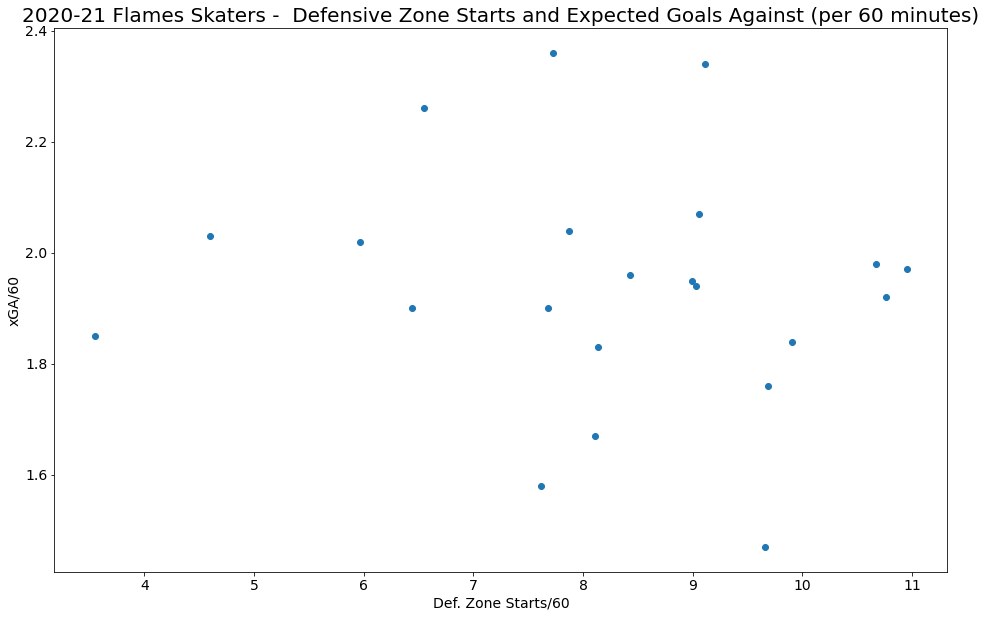

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('2020-21 Flames Skaters -  Defensive Zone Starts and Expected Goals Against (per 60 minutes)', fontsize=20)
plt.xlabel('Def. Zone Starts/60', fontsize=14)
plt.ylabel('xGA/60', fontsize=14)
plt.scatter(df['Def.\xa0Zone Starts/60'], df["xGA/60"])
# outliers?
df[["Player", 'Def.\xa0Zone Starts/60', 'xGA/60', 'TOI']].sort_values('Def.\xa0Zone Starts/60', ascending=False)

Team Overview - Expected Goals For (per 60 minutes)

<BarContainer object of 22 artists>

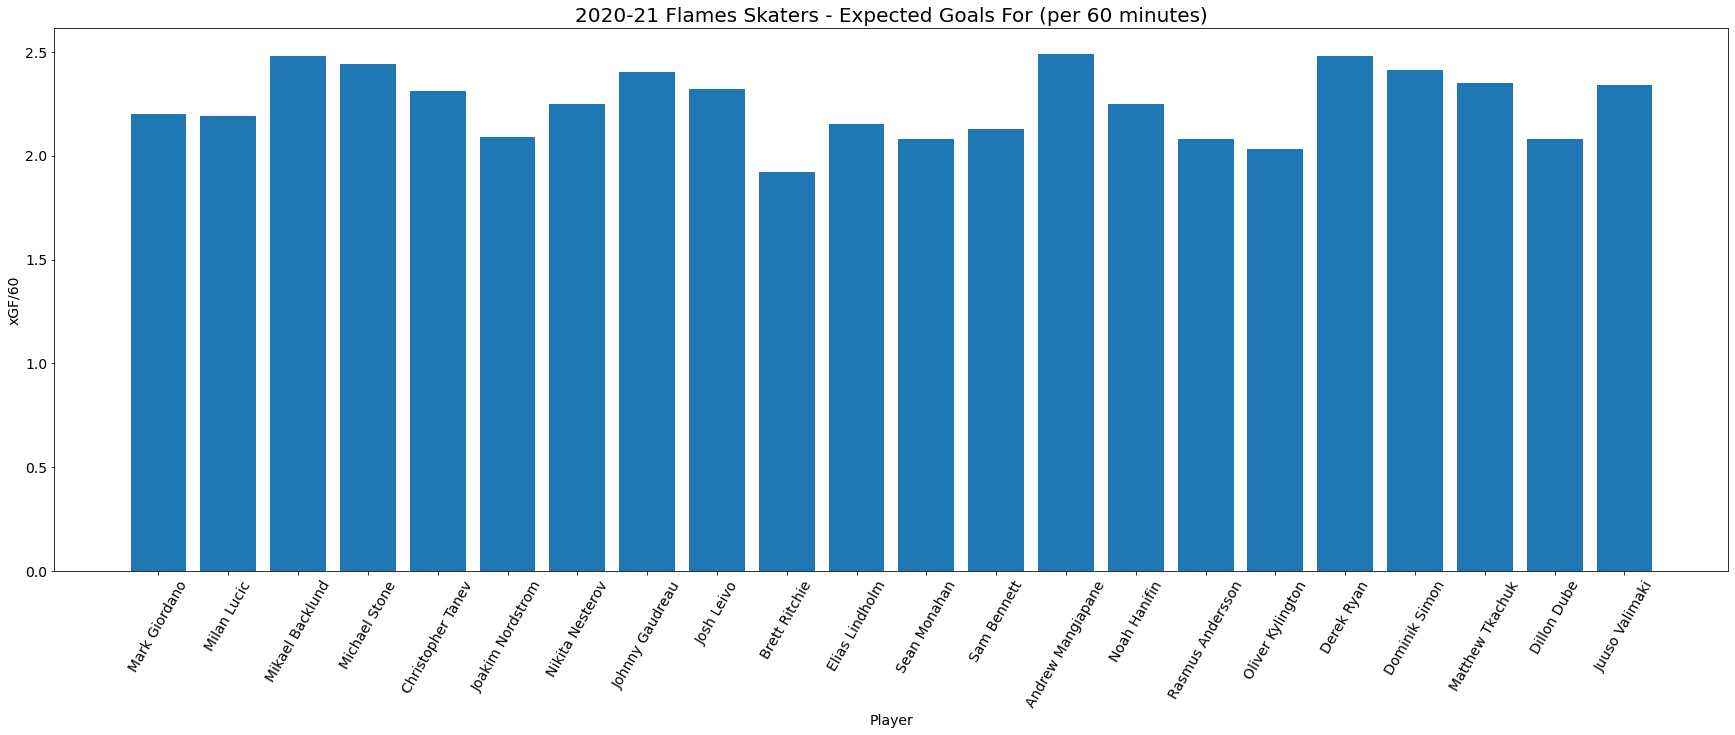

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.title('2020-21 Flames Skaters - Expected Goals For (per 60 minutes)', fontsize=20)
plt.xlabel('Player', fontsize=14)
plt.ylabel('xGF/60', fontsize=14)
plt.bar(df["Player"], df["xGF/60"])

# Data Visualization with Plotly

Team Overview - Goals For Percentage 

In [ ]:
# position_counts = df["Position"].value_counts()
# print(position_counts)

xgf_counts = df["xGF%"].value_counts(bins=5) # bins for best, above-average, average, below-average, worst
xgf_counts = xgf_counts.to_frame() # convert to data frame
xgf_counts["Category"] = ["Below Team Average (49.9%-52.7% xGF%)", "Team Average (52.7%-55.5% xGF%)", "Best on Team (58.3%-61.1% xGF%)", "Above Team Average (55.5%-58.3% xGF%)", "Worst on Team (47.0%-49.9% xGF%)"]
print(xgf_counts)

                              xGF%                               Category
(49.856, 52.672]                 7  Below Team Average (49.9%-52.7% xGF%)
(52.672, 55.488]                 6        Team Average (52.7%-55.5% xGF%)
(58.304, 61.12]                  3        Best on Team (58.3%-61.1% xGF%)
(55.488, 58.304]                 3  Above Team Average (55.5%-58.3% xGF%)
(47.025000000000006, 49.856]     3       Worst on Team (47.0%-49.9% xGF%)


In [ ]:
fig = px.pie(labels=xgf_counts.index, 
             values=xgf_counts["xGF%"], 
             title="2020-21 Flames Skaters - Skaters Grouped by xGF%", 
             names=xgf_counts["Category"],
             hole=0.6)  # creates a graph_object
fig.update_traces(textposition='outside', textinfo='percent+value')
fig.show()

Team Overview - Defensive Zone Starts per 60

In [ ]:
h_bar = px.bar(x = df["Def.\xa0Zone Starts/60"],
                y = df["Player"],
                orientation='h',
                color=df["Def.\xa0Zone Starts/60"],
                color_continuous_scale='Viridis',
                title='2020-21 Flames Skaters - Defensive Zone Starts per 60')
  
h_bar.update_layout(xaxis_title='Def.\xa0Zone Starts/60', yaxis_title='Player', coloraxis_showscale=True)
h_bar.show()

Team Overview - Expected Goals Against per 60

In [ ]:
h_bar = px.bar(x = df["xGA/60"],
                y = df["Player"],
                orientation='h',
                color=df["xGA/60"],
                color_continuous_scale='Viridis',
                title='2020-21 Flames Skaters - Expected Goals Against per 60')
  
h_bar.update_layout(xaxis_title='xGA/60', yaxis_title='Player', coloraxis_showscale=True)
h_bar.show()

Team Overview - High Danger Chances For, Expected Goals For, and Offensive Zone Starts (per 60)

In [ ]:
scatter = px.scatter(df, # data
                    x='HDCF/60', # column name
                    y='xGF/60',
                    title='Flames 2020-21 Skaters - High Danger Chances For, Expected Goals, and Offensive Zone Starts (per 60)',
                    size='Off.\xa0Zone Starts/60',
                    hover_name=df["Player"],
                    color='Off.\xa0Zone Starts/60')

scatter.update_layout(xaxis_title="HDCF/60",
                      yaxis_title="xGF/60",
                      yaxis=dict(type='log'))

scatter.show()

Team Overview - Offensive Zone Starts (per 60 minutes)

In [ ]:
bar = px.bar(x = df["Player"], # index = category name
             y = df["Off.\xa0Zone Starts/60"], # count
             title='2020-21 Flames Skaters - Offensive Zone Starts per 60',
             hover_name=df["Player"],
             color=df["Off.\xa0Zone Starts/60"],
             color_continuous_scale='Agsunset')
  
bar.update_layout(xaxis_title='Player',
yaxis_title='Off. Zone Starts/60',
coloraxis_showscale=False)
  
bar.show()

Box Plot (Median, Lower and Upper Quartiles) - Expected Goals For per 60 by Position

In [ ]:
box = px.box(df, 
             y='xGF/60', 
             x='Position',
             color='Position',
             notched=True,
             points='all',
             title='2020-2021 Flames Skaters - Expected Goals For per 60 by Position')
  
box.update_layout(yaxis=dict(type='log'))
  
box.show()

# Data Visualization - Seaborn

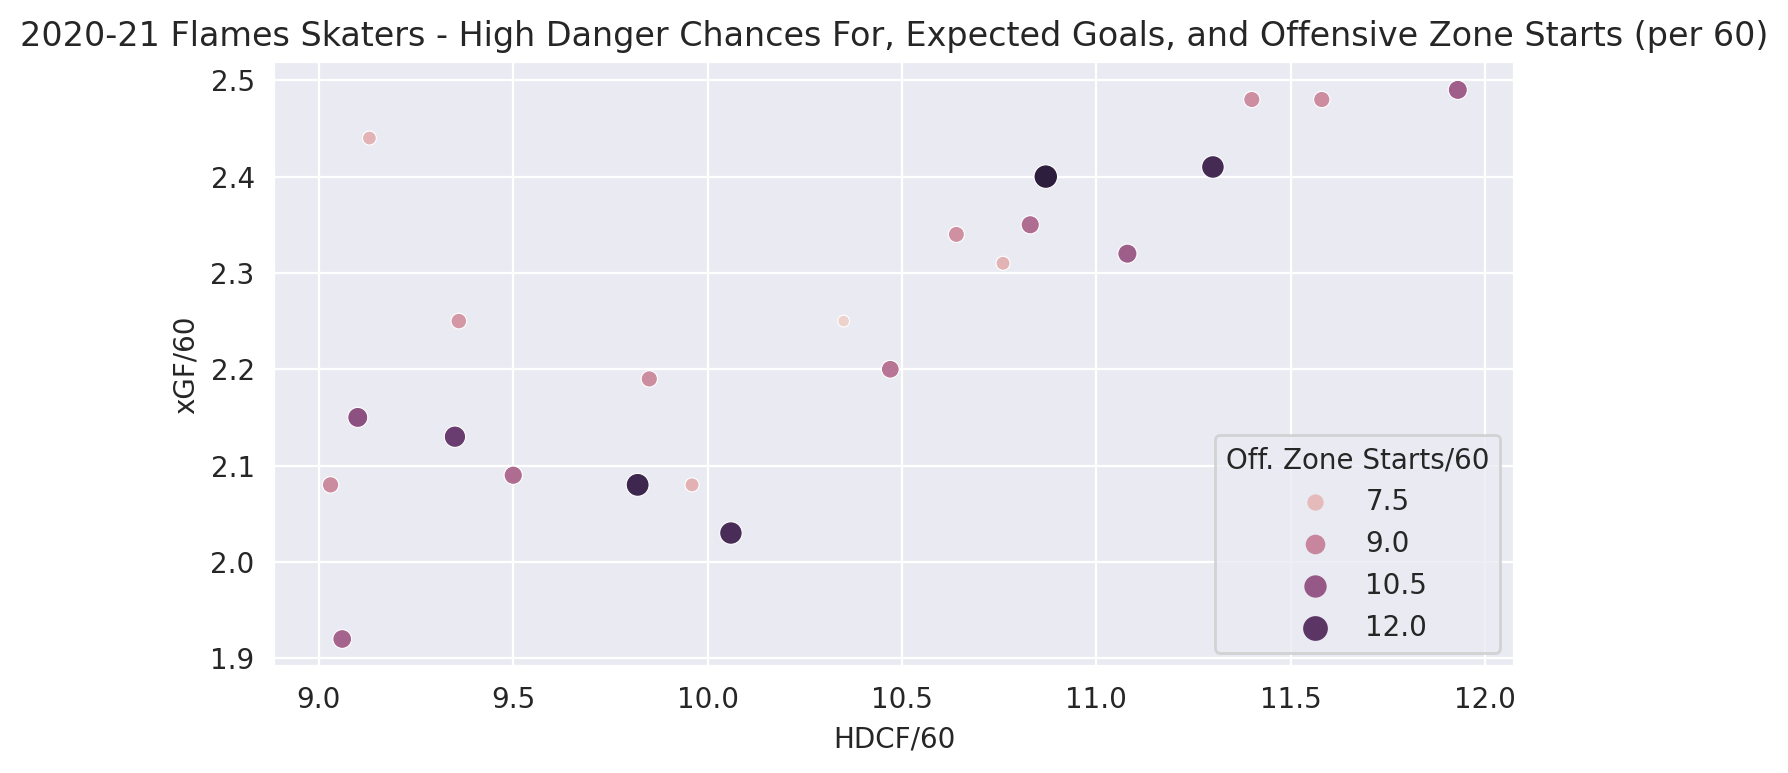

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=df,
                        x='HDCF/60',
                        y='xGF/60',
                        hue='Off.\xa0Zone Starts/60',
                        size='Off.\xa0Zone Starts/60')

  ax.set(ylabel='xGF/60', 
         xlabel='HDCF/60',
         title="2020-21 Flames Skaters - High Danger Chances For, Expected Goals, and Offensive Zone Starts (per 60)")

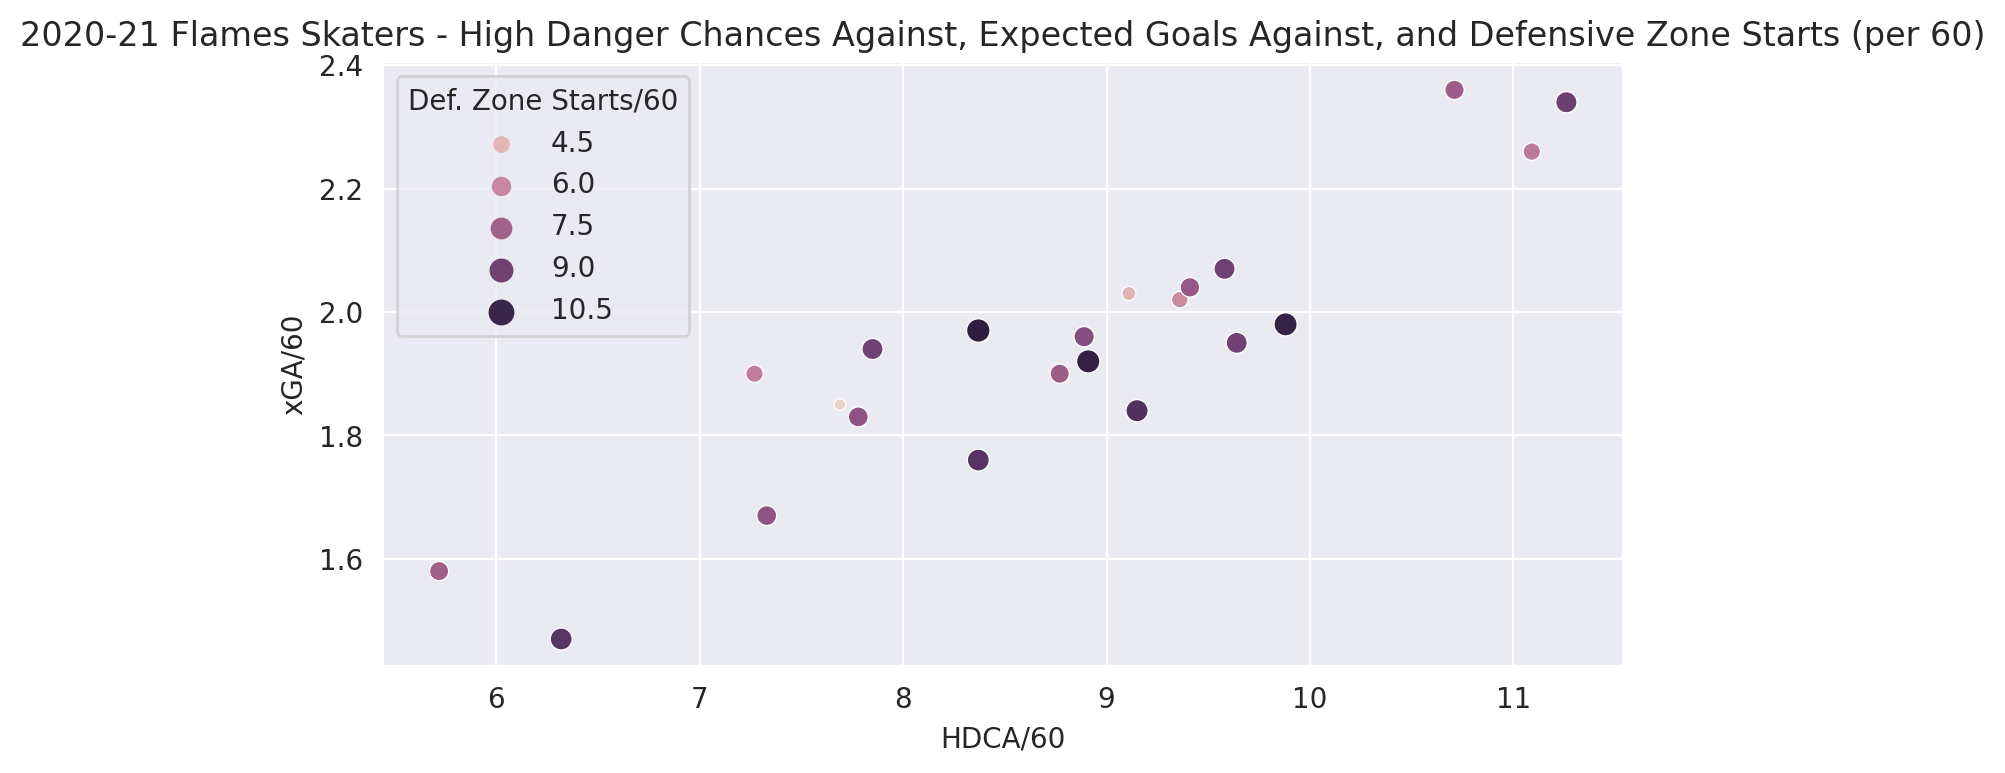

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=df,
                        x='HDCA/60',
                        y='xGA/60',
                        hue='Def.\xa0Zone Starts/60',
                        size='Def.\xa0Zone Starts/60')

  ax.set(ylabel='xGA/60', 
         xlabel='HDCA/60',
         title="2020-21 Flames Skaters - High Danger Chances Against, Expected Goals Against, and Defensive Zone Starts (per 60)")

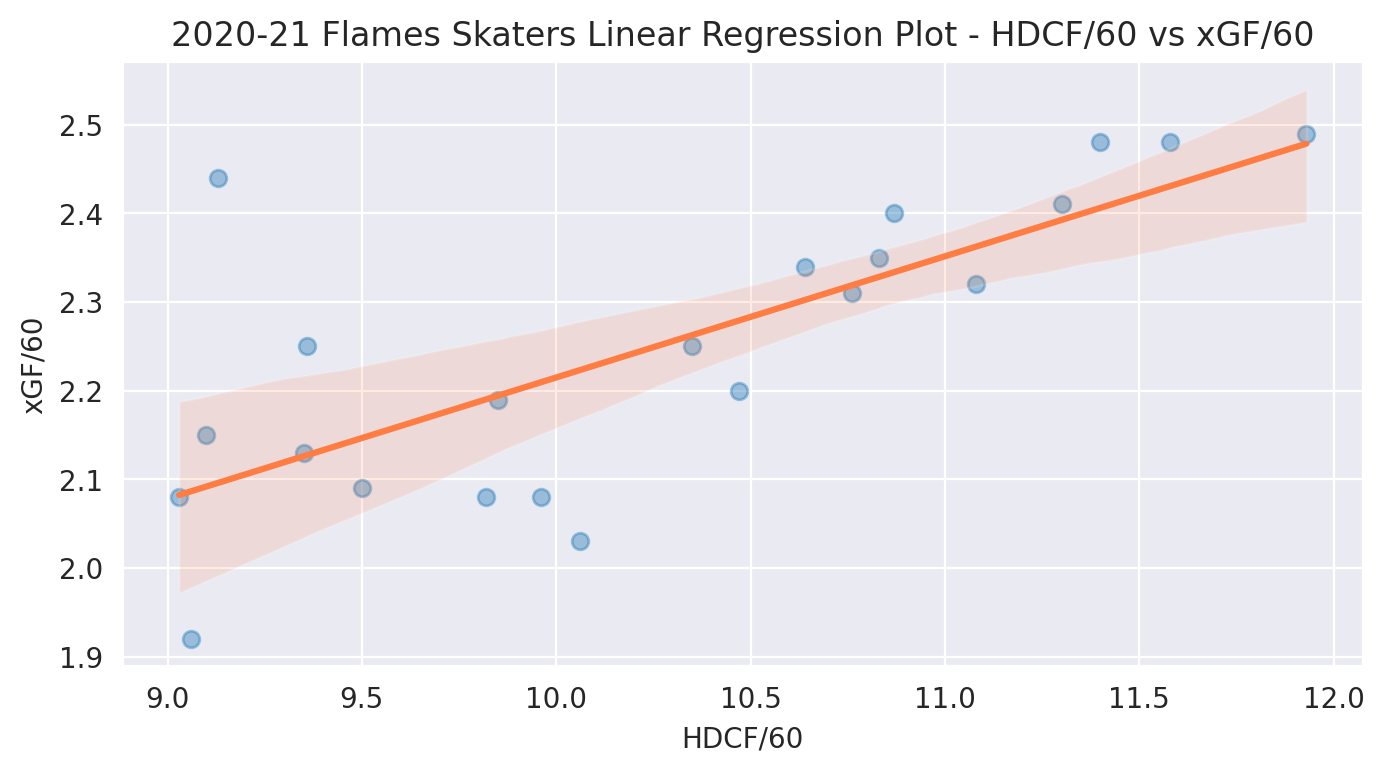

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=df,
              x='HDCF/60',
              y='xGF/60',
              scatter_kws = {'alpha': 0.4},
              line_kws = {'color': '#ff7c43'}
              )
  ax.set(title="2020-21 Flames Skaters Linear Regression Plot - HDCF/60 vs xGF/60")

Moving Average of the Linear Fit

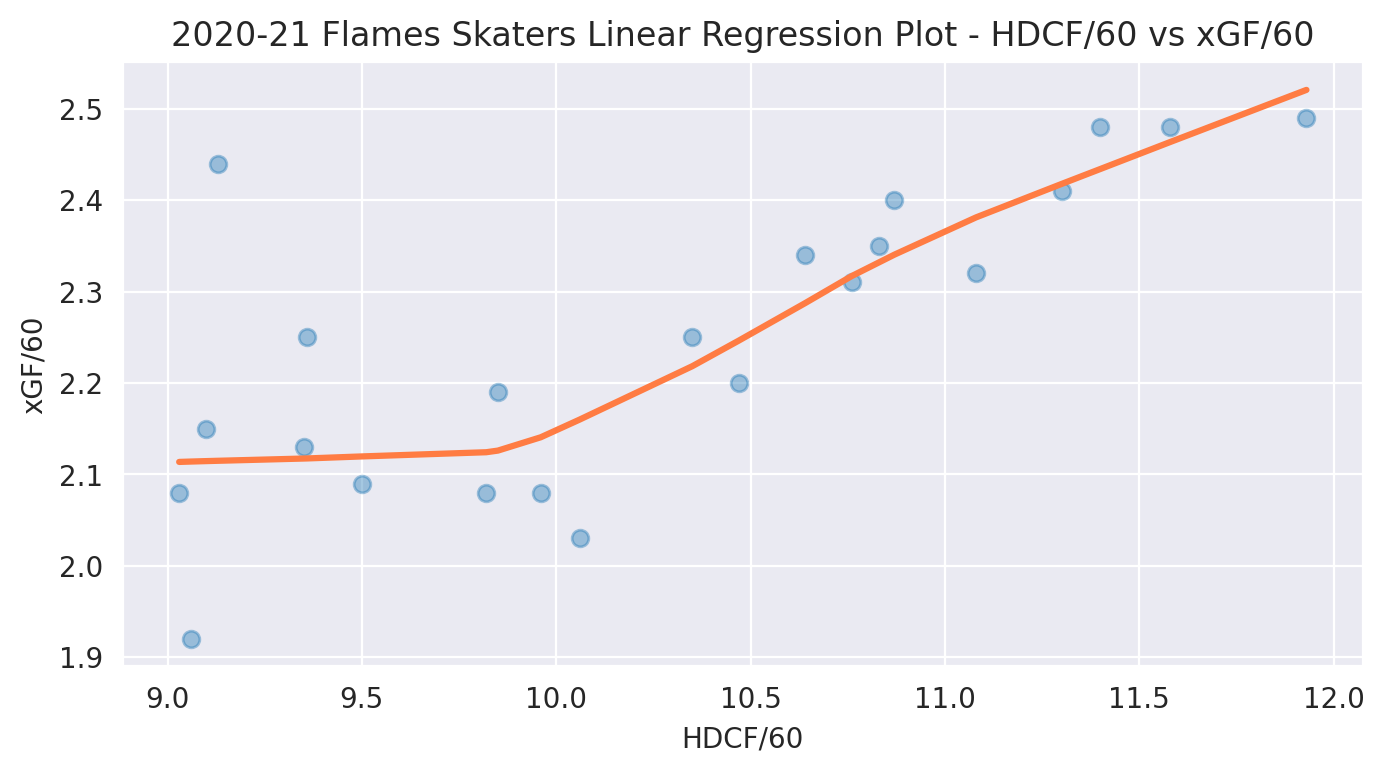

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=df,
              x='HDCF/60',
              y='xGF/60',
              lowess=True,
              scatter_kws = {'alpha': 0.4},
              line_kws = {'color': '#ff7c43'}
              )
  ax.set(title="2020-21 Flames Skaters Linear Regression Plot - HDCF/60 vs xGF/60")

Using the linear model to make a prediction
$$ (xGFper60) = \theta _0 + \theta _1*(HDCFper60) $$

In [ ]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(df, columns=['HDCF/60'])
  
# Response Variable or Target
y = pd.DataFrame(df, columns=['xGF/60']) 

# Find the best-fit line
regression.fit(X, y)

#Theta zero
print(f"y-intercept: {regression.intercept_}")

#Theta one
print(f"slope: {regression.coef_}")

# R-squared - 55% of the variance in xGF/60 is explained by variance in HDCF/60
print(f"r-squared: {regression.score(X, y)}")

y-intercept: [0.84856966]
slope: [[0.13663429]]
r-squared: 0.5529061432730906


Question: How much xGF/60 does the model estimate for a player with a HDCF/60 of 13?

In [ ]:
hdcf_per_60 = 13
xGF_per_60_estimate = regression.intercept_[0] + regression.coef_[0,0]*hdcf_per_60
xGF_per_60_estimate = round(xGF_per_60_estimate, 3)
print(f'The estimated xGF/60 for a player with an {float(hdcf_per_60)} is around {xGF_per_60_estimate:.2}.')

The estimated xGF/60 for a player with an 13.0 is around 2.6.


Histogram - xGF%

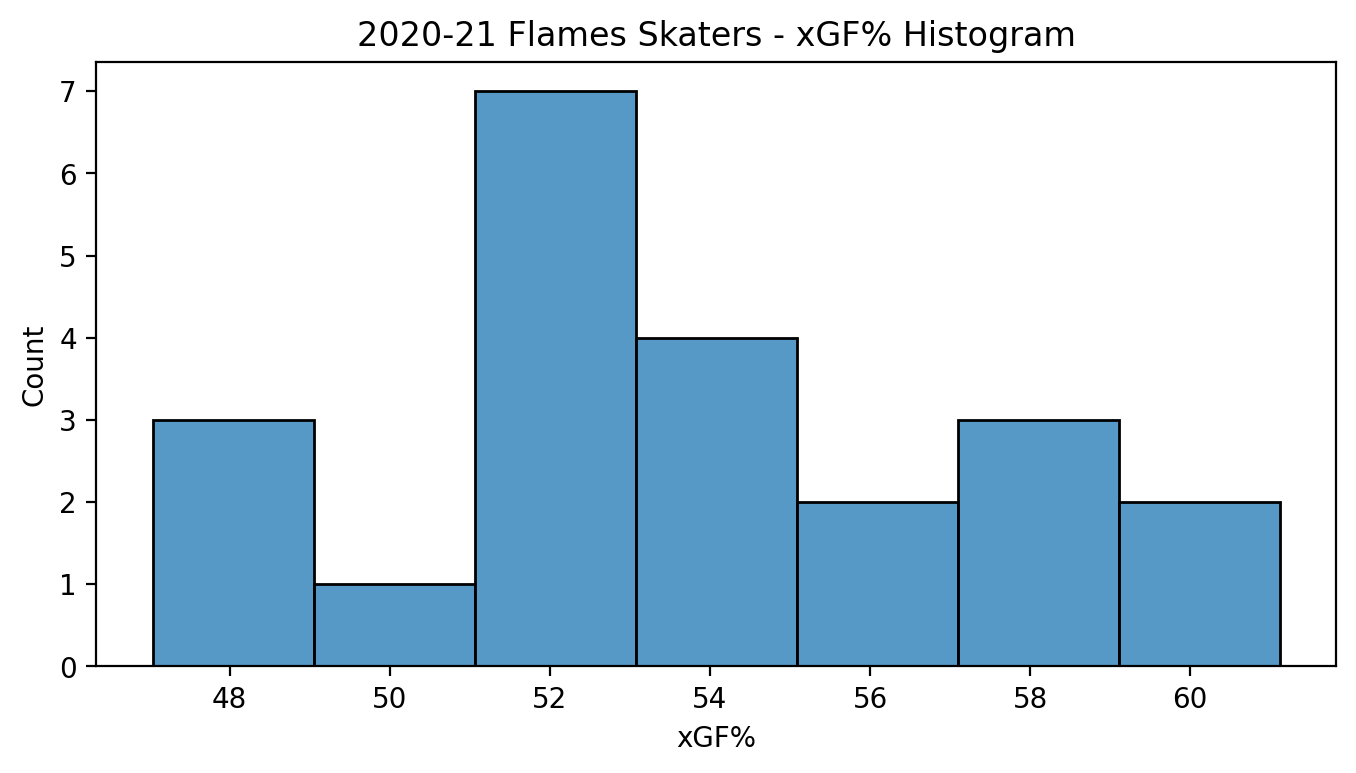

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df,
              x=df["xGF%"],
              bins=7)
plt.xlabel('xGF%')
plt.title('2020-21 Flames Skaters - xGF% Histogram')
plt.show()

Histogram for xGF% with Kernel Density Estimate

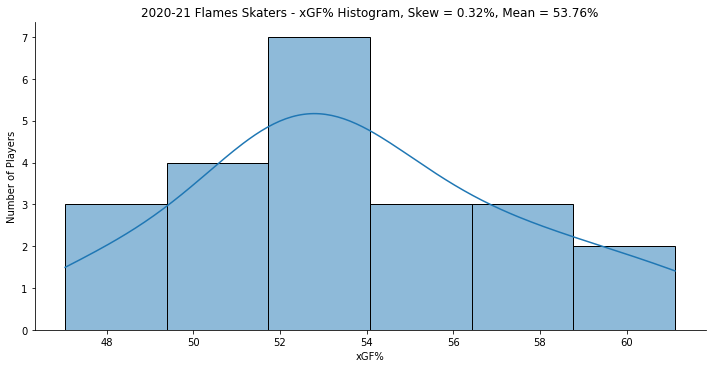

In [ ]:
xgf_skew = df['xGF%'].skew()
xgf_mean = df['xGF%'].mean()
fig = sns.displot(data=df, x="xGF%", kde=True, aspect=2)
fig.set_axis_labels("xGF%", "Number of Players")
fig.set(title=f'2020-21 Flames Skaters - xGF% Histogram, Skew = {xgf_skew:.2f}%, Mean = {xgf_mean:.2f}%')

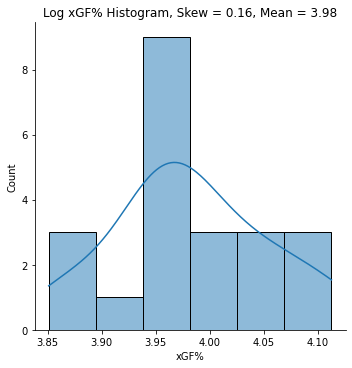

In [ ]:
log_xgf= np.log(df['xGF%'])
log_xgf_skew = log_xgf.skew()
log_xgf_mean = log_xgf.mean()
sns.displot(log_xgf, kde=True)
plt.title(f'Log xGF% Histogram, Skew = {log_xgf_skew:.2f}, Mean = {log_xgf_mean:.2f}')
plt.show()

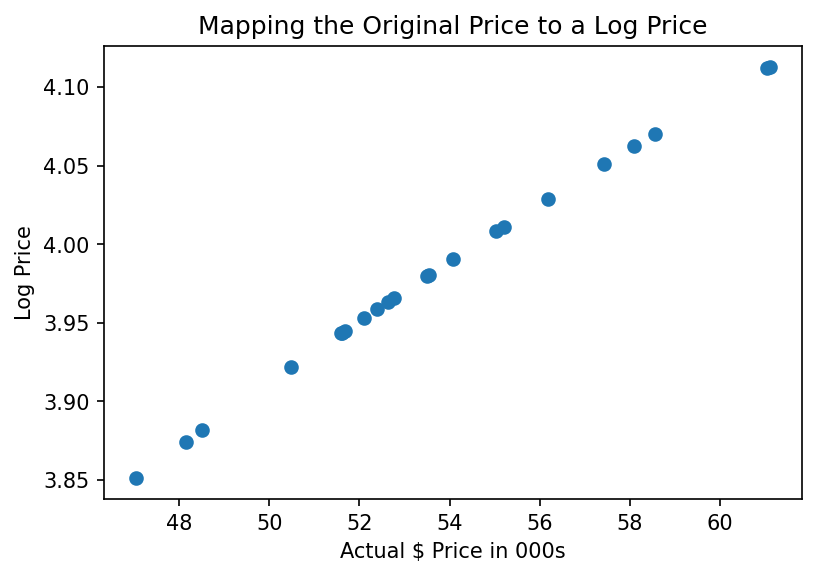

In [ ]:
plt.figure(dpi=150)
plt.scatter(df["xGF%"], np.log(df["xGF%"]))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

Add New Column to Indicate if a Player's Off. Zone Starts/60 was Above or Below the Team Average

In [ ]:
avg_off_starts_60 = df['Off.\xa0Zone Starts/60'].mean()
print(avg_off_starts_60)
df["Above Avg. Off. Starts?"] = np.where(df['Off.\xa0Zone Starts/60'] < avg_off_starts_60, "No", "Yes")
df[["Player", "Off.\xa0Zone Starts/60", "Above Avg. Off. Starts?"]]

9.778636363636364


,Player,Off. Zone Starts/60,Above Avg. Off. Starts?
0,Mark Giordano,9.55,No
1,Milan Lucic,8.77,No
2,Mikael Backlund,8.74,No
3,Michael Stone,7.68,No
4,Christopher Tanev,7.72,No
5,Joakim Nordstrom,9.81,Yes
6,Nikita Nesterov,8.45,No
7,Johnny Gaudreau,13.11,Yes
8,Josh Leivo,10.30,Yes
9,Brett Ritchie,10.09,Yes


How Varied are Expected Goals For per 60 for Players with Above or Below Average Off. Zone Starts/60?

In [ ]:
box = px.box(df,
             x='Above Avg. Off. Starts?',
             y='xGF/60',
             color='Above Avg. Off. Starts?',
             title='Flames 2020-21 - Variation in xGF/60 for Skaters Above or Below Average Off. Zone Starts/60')
  
box.update_layout(xaxis_title='Above Average Off. Zone Starts/60?',
                  yaxis_title='xGF/60',)
  
box.show()

How Varied is HDCF/60 for Players with Above or Below Average Off. Zone Starts/60?

In [ ]:
hist = px.histogram(df,
                    x='HDCF/60',
                    color='Above Avg. Off. Starts?',
                    nbins=13,
                    opacity=0.5,
                    barmode='overlay',
                    histnorm='percent',
                    marginal='box',
                    title="2020-21 Flames Skaters - HDCF/60 Histogram for Skaters Above or Below Average Off. Zone Starts/60")

hist.update_layout(xaxis_title='HDCF/60',
                    yaxis_title='Number of Players (%)',)

hist.show()

Kernel Density Estimate for Visualizing Smooth Distributions for Expected Goals For based off Off. Zone Starts

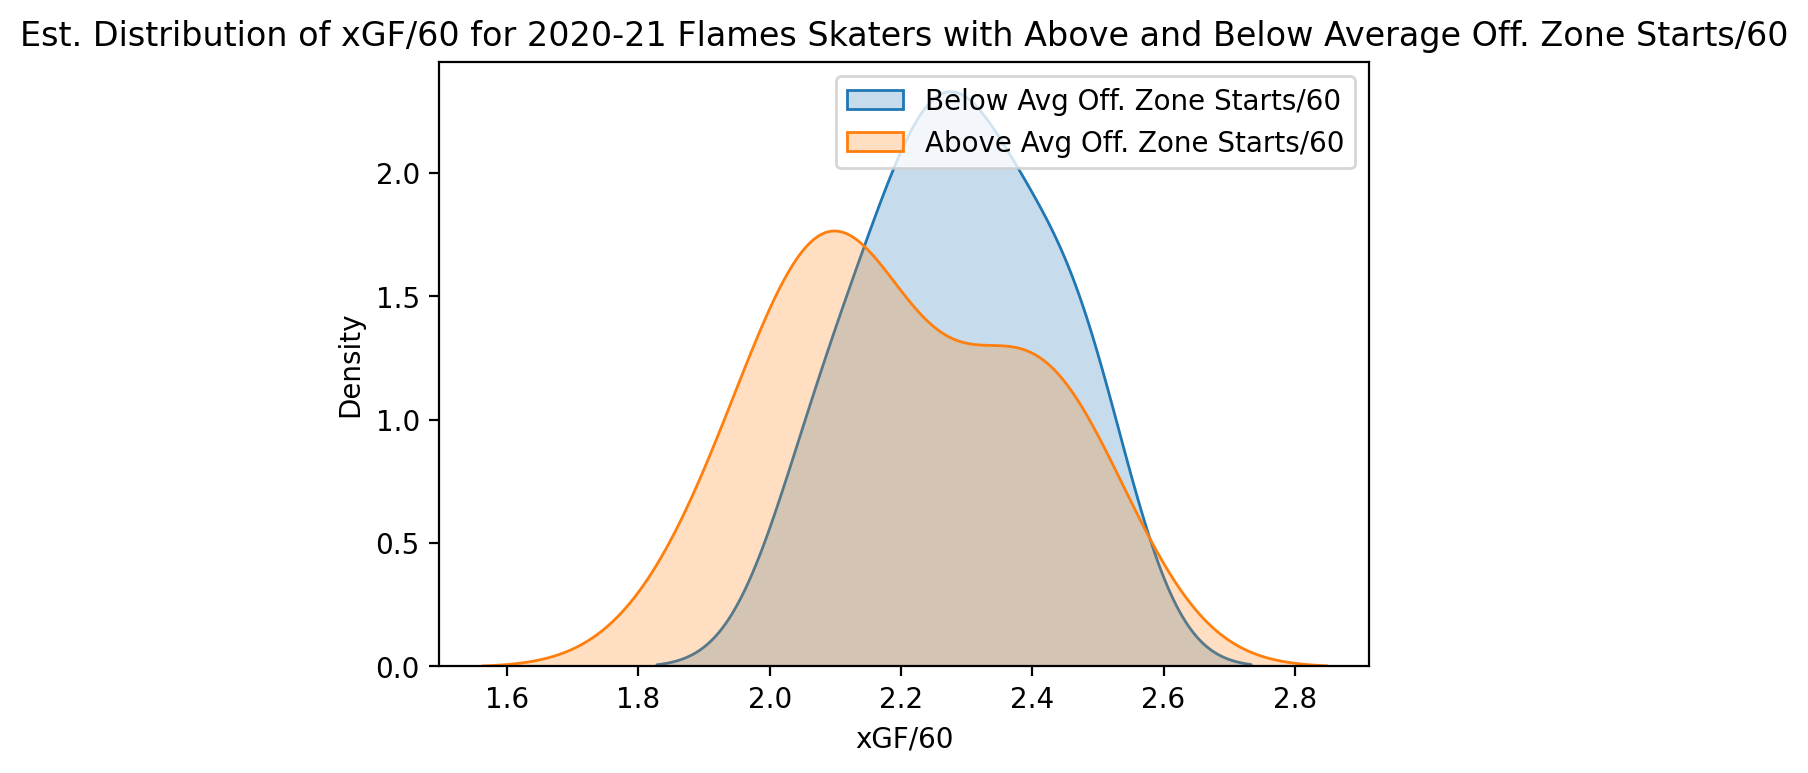

In [ ]:
plt.figure(dpi=200)
below_avg_df = df[df['Above Avg. Off. Starts?'] == 'No']
above_avg_df = df[df['Above Avg. Off. Starts?'] == 'Yes']
sns.kdeplot(below_avg_df["xGF/60"], shade=True, label="Below Avg Off. Zone Starts/60")
sns.kdeplot(above_avg_df["xGF/60"], shade=True, label="Above Avg Off. Zone Starts/60")
plt.title('Est. Distribution of xGF/60 for 2020-21 Flames Skaters with Above and Below Average Off. Zone Starts/60')
plt.legend()
plt.show()

T-Test to Determine Statistical Significance

In [ ]:
t_stat, p_value = stats.ttest_ind(a=below_avg_df["xGF/60"], 
                                  b=above_avg_df["xGF/60"])
print(f'p-value is {p_value:.10f}')
print(f't-statistic is {t_stat:.4}')

p-palue is 0.2360589179
t-statstic is 1.222


Alternative Look at HDCF/60 vs xGF/60 - Joint Plot

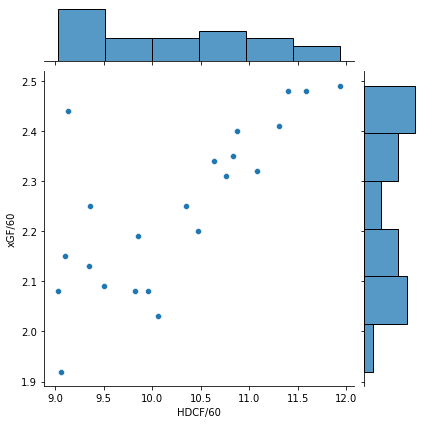

In [ ]:
sns.jointplot(data=df, x='HDCF/60', y='xGF/60')